<a href="https://colab.research.google.com/github/bhagyashridhavale/Capstone-project-I-Hotel-booking-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA capstone project - I/Hotel Bookings.csv")

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [ ]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Data Cleaning**

In [ ]:
df.drop(columns=['company','agent'],inplace=True) 

In [ ]:
df['total_guest'] = df['adults'] + df['children'] + df['babies']

In [ ]:
df = df[df['adults']!=0]

In [ ]:
df = df[df['adr']>0]

combine the date columns into single arrival_date column with pd.to_datetime

In [ ]:
df['arrival_date'] = df['arrival_date_month'] +" "+ df['arrival_date_day_of_month'].astype(str) + " " + df['arrival_date_year'].astype(str)
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117182 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           117182 non-null  object        
 1   is_canceled                     117182 non-null  int64         
 2   lead_time                       117182 non-null  int64         
 3   arrival_date_year               117182 non-null  int64         
 4   arrival_date_month              117182 non-null  object        
 5   arrival_date_week_number        117182 non-null  int64         
 6   arrival_date_day_of_month       117182 non-null  int64         
 7   stays_in_weekend_nights         117182 non-null  int64         
 8   stays_in_week_nights            117182 non-null  int64         
 9   adults                          117182 non-null  int64         
 10  children                        117178 non-null  float64

In [ ]:
df.drop('arrival_date_week_number',inplace=True,axis=1)

In [ ]:
df['country'].mode()

0    PRT
dtype: object

In [ ]:
df.loc[df['country']=='PRT','country'].count()

46989

In [ ]:
df['country'].fillna(df['country'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [ ]:
df['children'].median()

0.0

In [ ]:

df['children'].fillna(df['children'].median(),inplace=True)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [ ]:
df['total_guests'] = df['adults'] + df['children'] + df['babies'] 

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guest,arrival_date,total_guests
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,2015-07-01,1.0
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,2015-07-01,1.0
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2015-07-01,2.0
5,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2015-07-01,2.0
6,Resort Hotel,0,0,2015,July,1,0,2,2,0.0,...,0,Transient,107.0,0,0,Check-Out,2015-07-03,2.0,2015-07-01,2.0


**EDA**

use sns.countplot to obtain the count of reservations of city hotel vs resort hotel

Text(0, 0.5, 'Reservation Count')

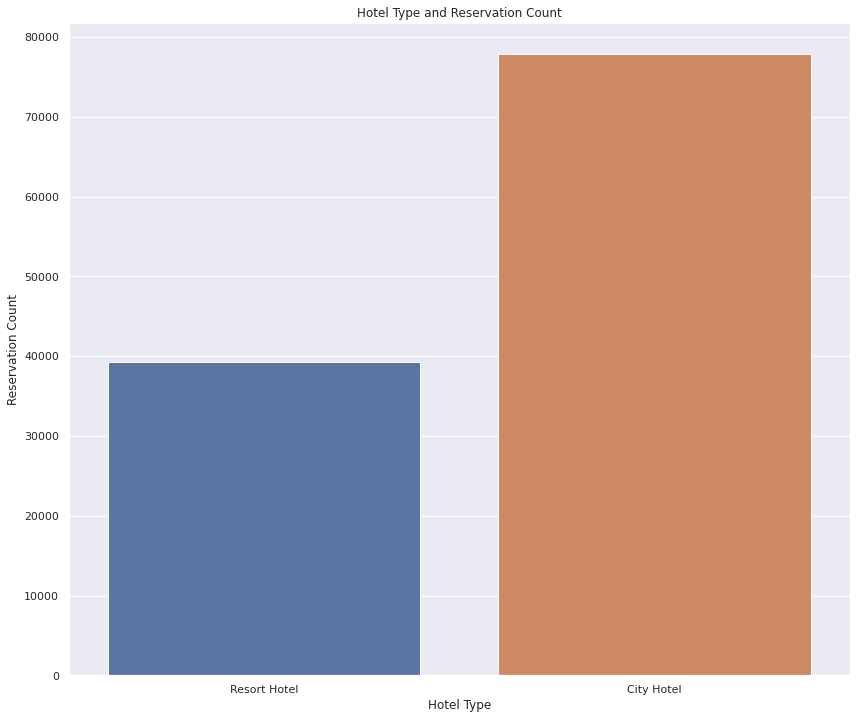

In [ ]:
sns.set(rc={'figure.figsize':(14,12)})
graph= sns.countplot(x='hotel',data=df)
graph.set(title='Hotel Type and Reservation Count')
graph.set_xlabel('Hotel Type',fontsize=12)
graph.set_ylabel('Reservation Count',fontsize=12)

In [ ]:
df['hotel'].value_counts(normalize=True)

City Hotel      0.664565
Resort Hotel    0.335435
Name: hotel, dtype: float64

**Number of Cancellations/Non-Cancellations**

Text(0, 0.5, 'Reservation Count')

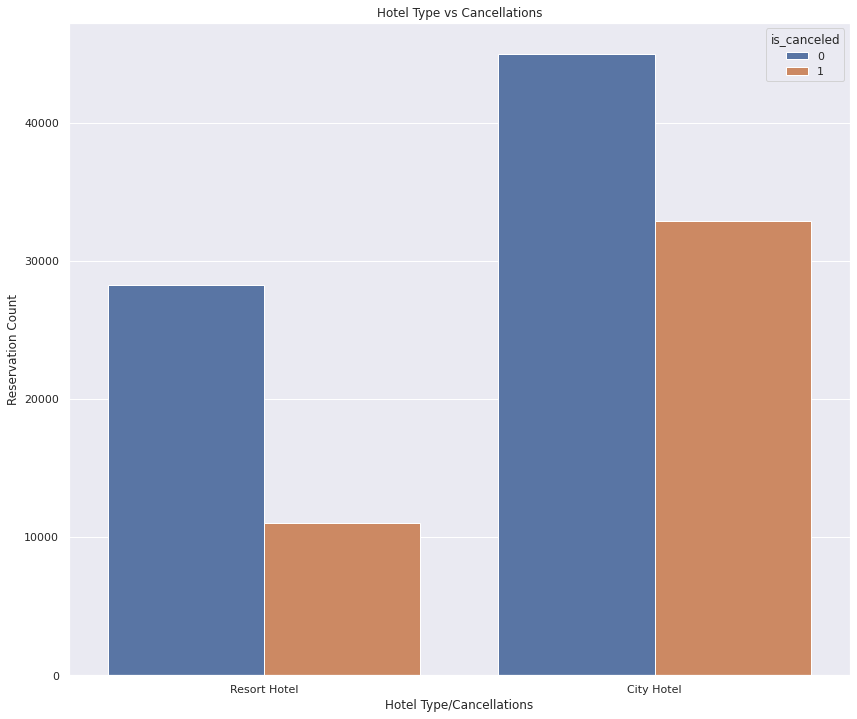

In [ ]:
sns.set(rc={'figure.figsize':(14,12)})
graph= sns.countplot(x='hotel',hue='is_canceled',data=df)
graph.set(title='Hotel Type vs Cancellations')
graph.set_xlabel('Hotel Type/Cancellations',fontsize=12)
graph.set_ylabel('Reservation Count',fontsize=12)

   **use sns.countplot to get the number of arrivals each month for each hotel type**

Text(0, 0.5, 'Count')

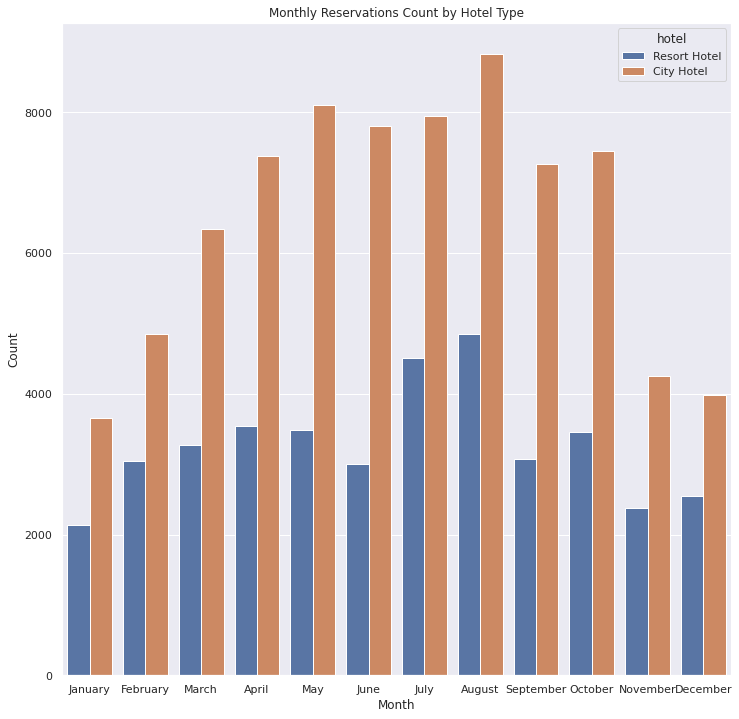

In [ ]:
sns.set(rc={'figure.figsize':(12,12)})
graph = sns.countplot(x='arrival_date_month', 
                     hue='hotel',
                     data=df,
                     order=["January","February","March","April","May","June","July","August","September","October","November","December"])                      
graph.set(title='Monthly Reservations Count by Hotel Type')
graph.set_xlabel('Month',fontsize=12)
graph.set_ylabel('Count',fontsize=12)

From the chart above , hotel stays tend to high during july and august,and in winter from november and february tend to low.

**use sns.countplot to obtain the number of adults reserving and number of families with children reserving.**

Text(0, 0.5, 'Reservation Count')

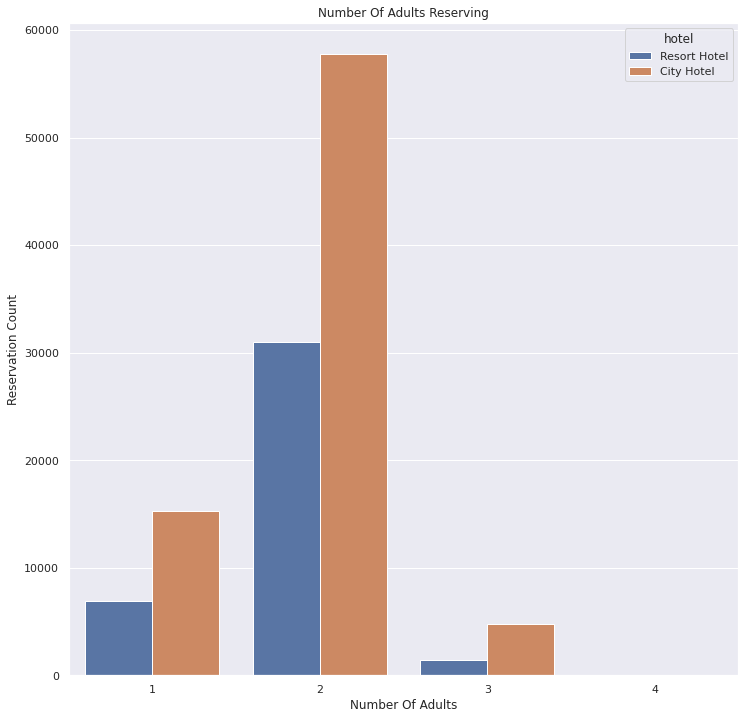

In [ ]:
sns.set(rc={'figure.figsize':(12,12)})
graph = sns.countplot(x='adults',hue='hotel',data=df)                      
graph.set(title='Number Of Adults Reserving')
graph.set_xlabel('Number Of Adults',fontsize=12)
graph.set_ylabel('Reservation Count',fontsize=12)

Text(0, 0.5, 'Reservation Count')

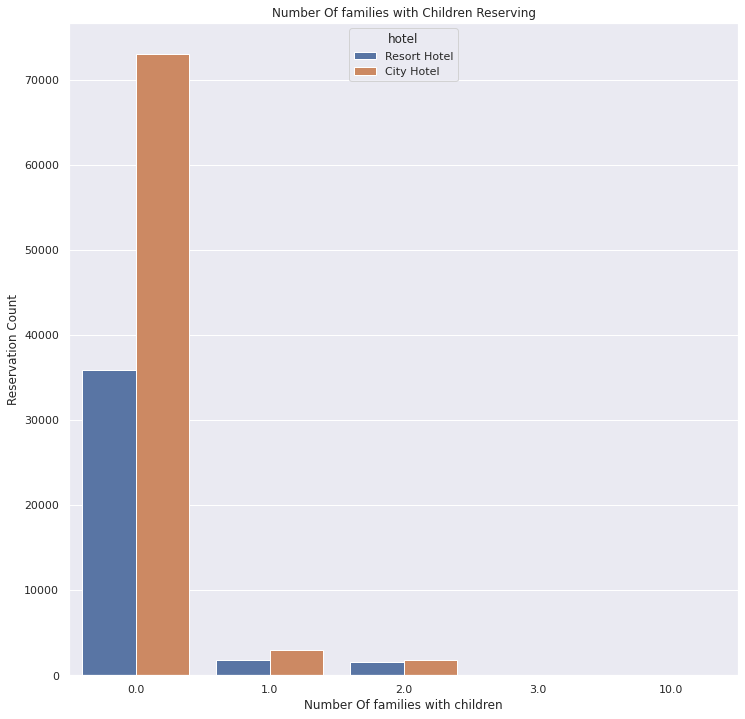

In [ ]:
sns.set(rc={'figure.figsize':(12,12)})
graph = sns.countplot(x='children',hue='hotel',data=df)                      
graph.set(title='Number Of families with Children Reserving')
graph.set_xlabel('Number Of families with children',fontsize=12)
graph.set_ylabel('Reservation Count',fontsize=12)

use Lineplot to get guests per hotel each month.

Text(0, 0.5, 'Total Guests Count')

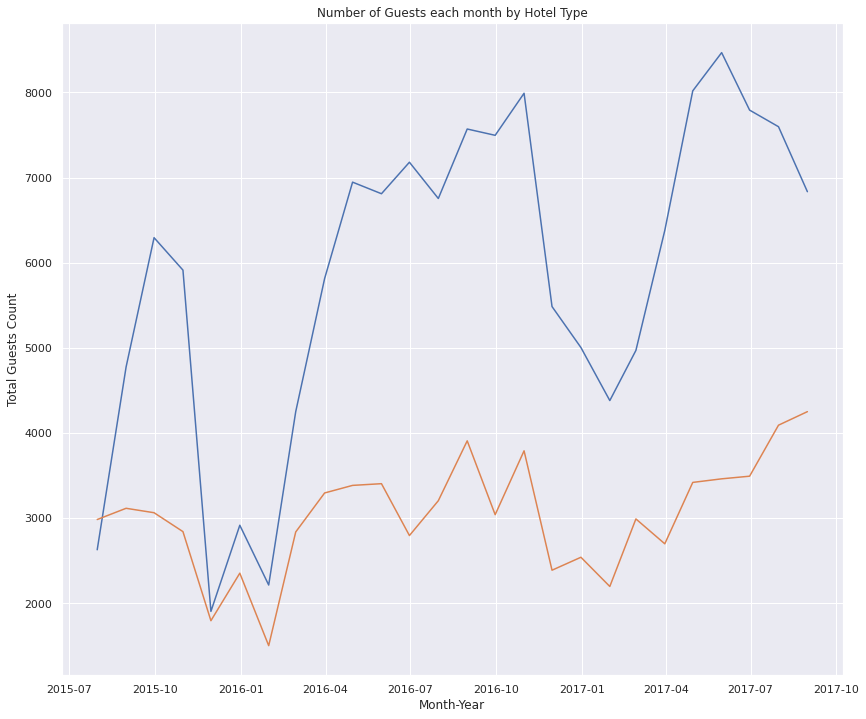

In [ ]:
sns.set(rc={'figure.figsize':(14,12)})
fig, ax = plt.subplots()
sns.lineplot(
    data=df[df['hotel']=='City Hotel'].groupby(pd.Grouper(key='arrival_date',axis=0,
                      freq='M')).sum().reset_index(),
    x="arrival_date",
    y="total_guests",
    ax=ax
)

sns.lineplot(
    data=df[df['hotel']=='Resort Hotel'].groupby(pd.Grouper(key='arrival_date',axis=0,
                      freq='M')).sum().reset_index(),
    x="arrival_date",
    y="total_guests",
    ax=ax
)
ax.set(title="Number of Guests each month by Hotel Type") 
ax.set_xlabel("Month-Year", fontsize=12)
ax.set_ylabel("Total Guests Count", fontsize = 12)                                        

Use Lineplot to get total car parking spaces.

Text(0, 0.5, 'Parking Spaces Required')

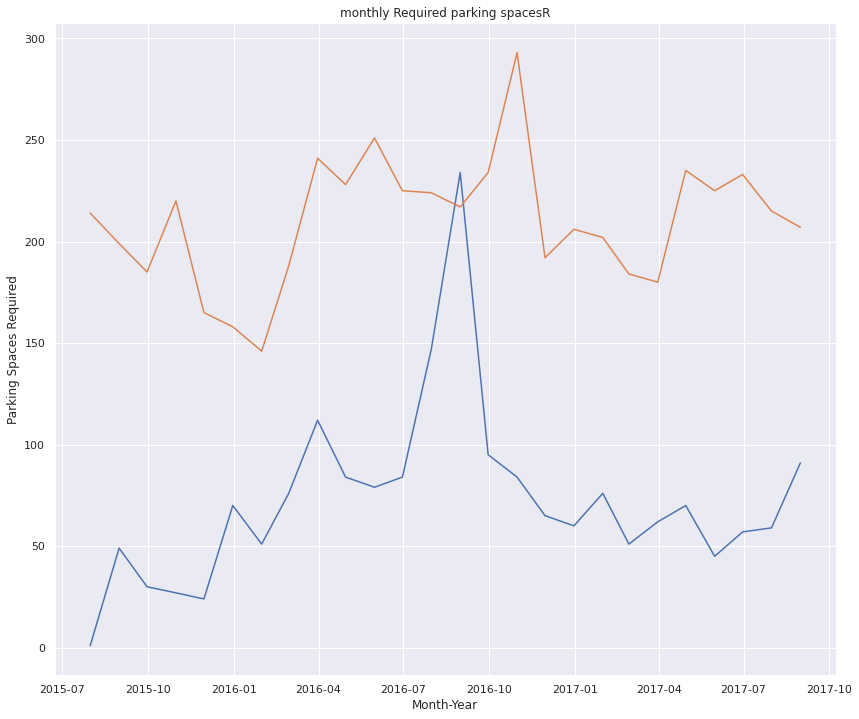

In [ ]:
sns.set(rc={'figure.figsize':(14,12)})
fig,ax=plt.subplots()
sns.lineplot(
    data=df[df['hotel']=='City Hotel'].groupby(pd.Grouper(key='arrival_date', axis=0,
                      freq='M')).sum().reset_index(),
    x="arrival_date",
    y="required_car_parking_spaces",
    ax=ax
)

sns.lineplot(
    data=df[df['hotel']=='Resort Hotel'].groupby(pd.Grouper(key='arrival_date', axis=0,
                      freq='M')).sum().reset_index(),
    x="arrival_date",
    y="required_car_parking_spaces",
    ax=ax
)
ax.set(title="monthly Required parking spacesR") 
ax.set_xlabel("Month-Year", fontsize=12)
ax.set_ylabel("Parking Spaces Required", fontsize = 12)                                        

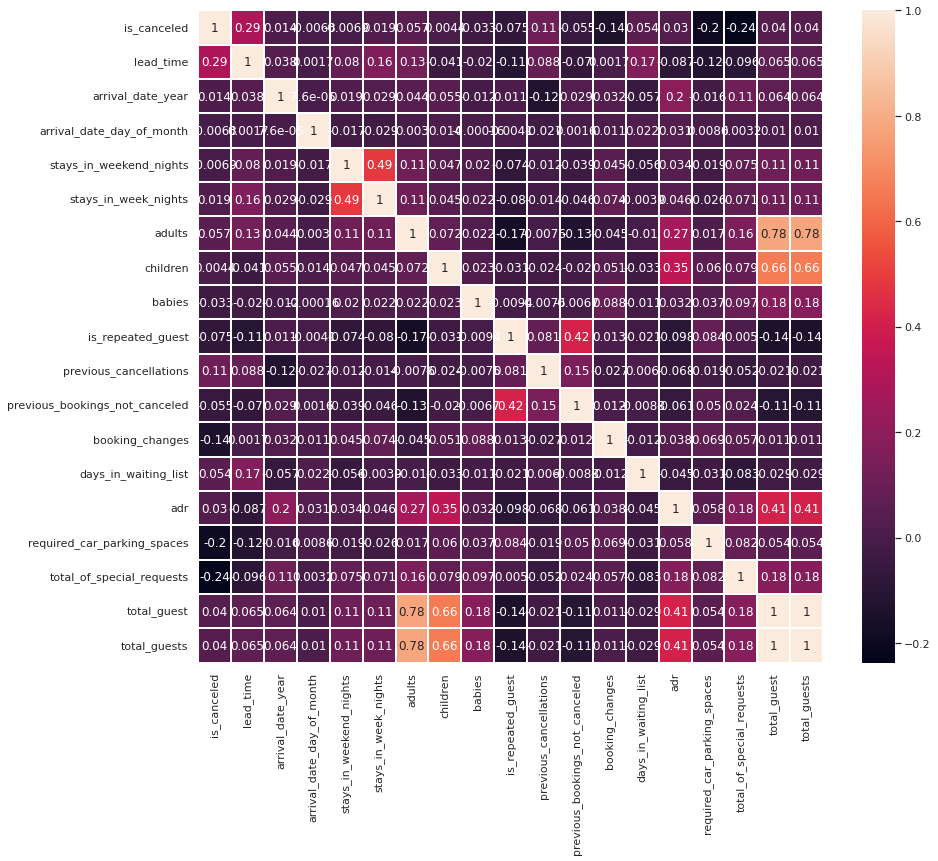

In [ ]:
plt.figure(figsize=( 14 , 12))
corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

**EDA Conclusion**

1) City hotel has more reservation than resort hotel.

2) City hotel has more cancellations compared to resort hotel.

3) Resort hotels are choice for large groups / families.

4)) City hotel has more guests in August and resort hotel also has more guests   in August.   

5) March to October has high business.

6) November to January low business.

7) More number of people in guests results in more number of special requests.

8) In 2016 city hotel parking reached 300 and resort hotel has surge parking.


**Summary**

Hotel Booking Analysis project done by Bhagyashri Ramesh Dhavale(Self).

When i found csv file on Hotel Booking Analysis ,then i came to know,there were so many aspects to explore from this dataset.I focused on some of aspects.following are:-
(1) I wanted to see more people are came from which hotel.

(2) more customer came from which segments.

(3) busiest month for both hotels.

(4) interest of people as per choice of hotels.

finally i found :
I. city hotel has more reservation.

II. And also more cancellations as compared to resort hotel.

III.Both hotels has more busiest days in March and October, and low business in November and January.


**THANk YOU.**